# Import packages

In [398]:
#packages u know
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from nltk.stem import PorterStemmer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christofferengelhardt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Import data

In [399]:
def combine_datasets(path1, path2):
    # Load data
    df1 = pd.read_csv(path1)
    df2 = pd.read_csv(path2)
    
    # Combine the dataframes
    combined_df = pd.concat([df1, df2], ignore_index=True, sort=False)
    
    return combined_df

# Call the function with the paths to your datasets
combined_df = combine_datasets("Springer_Journal_Intro_v1.csv", "Economics_Letters_treated.csv")

# Drop rows where 'Intro' is NaN (if required)
combined_df = combined_df.dropna(subset=['Intro'])

# Cleaning data

In [400]:
# Assuming you have already loaded combined_df somewhere above in your code

# Make a copy of the original dataframe to work on
df_cleaned = combined_df.copy()

# Set up the stop words
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Remove content between parentheses using regex
    text = re.sub(r'\([^)]*\)', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags/markup
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuations, numbers and other non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub('\s+', ' ', text).strip()
    return text

# Function to remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Function for lemmatization
def lemmatize_text(text):
    wnl = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Process tracking counter
counter = 0

# Apply the cleaning function
def process_and_track(func, text):
    global counter
    counter += 1
    if counter % 500 == 0:
        print(f"Processed {counter} records for cleaning.")
    return func(text)

df_cleaned['Intro'] = df_cleaned['Intro'].apply(lambda x: process_and_track(clean_text, x))
df_cleaned['Intro'] = df_cleaned['Intro'].apply(lambda x: process_and_track(remove_stop_words, x))
df_cleaned['Intro'] = df_cleaned['Intro'].apply(lambda x: process_and_track(lemmatize_text, x))

Processed 500 records for cleaning.
Processed 1000 records for cleaning.
Processed 1500 records for cleaning.
Processed 2000 records for cleaning.
Processed 2500 records for cleaning.
Processed 3000 records for cleaning.
Processed 3500 records for cleaning.
Processed 4000 records for cleaning.
Processed 4500 records for cleaning.
Processed 5000 records for cleaning.
Processed 5500 records for cleaning.
Processed 6000 records for cleaning.
Processed 6500 records for cleaning.
Processed 7000 records for cleaning.
Processed 7500 records for cleaning.
Processed 8000 records for cleaning.
Processed 8500 records for cleaning.
Processed 9000 records for cleaning.
Processed 9500 records for cleaning.
Processed 10000 records for cleaning.
Processed 10500 records for cleaning.
Processed 11000 records for cleaning.
Processed 11500 records for cleaning.
Processed 12000 records for cleaning.
Processed 12500 records for cleaning.
Processed 13000 records for cleaning.
Processed 13500 records for clea

In [401]:
# Export the cleaned dataframe to a CSV file
file_path = "df_cleaned.csv"
df_cleaned.to_csv(file_path, index=False)
file_path

'df_cleaned.csv'

# Visualization

In [403]:
#Prepare the data for Visualization
unique_journals = df_cleaned['Journal Name'].unique()
gender_counts = df_cleaned['Article_Gender'].value_counts()
unique_years = df_cleaned['Published Date'].unique()
year_counts = df_cleaned['Published Date'].value_counts()
citations_summary = df_cleaned['Citations'].describe()

In [404]:
#Shows all journals in the dataset
print(unique_journals)

['Journal of Risk and Uncertainty' 'International Tax and Public Finance'
 'Letters in Spatial and Resource Sciences'
 'Asia-Pacific Journal of Regional Science'
 'Review of Economics of the Household'
 'Brazilian Journal of Science and Technology' 'Cliometrica'
 'Atlantic Economic Journal' 'Review of Evolutionary Political Economy'
 'Journal of the Knowledge Economy'
 'NETNOMICS: Economic Research and Electronic Networking'
 'The Annals of Regional Science' 'IZA Journal of Labor Policy'
 'Empirical Economics' 'Journal of Geographical Systems'
 'Decisions in Economics and Finance' 'Financial Innovation'
 'The Journal of Real Estate Finance and Economics'
 'International Advances in Economic Research'
 'Journal of Productivity Analysis' 'Journal of Regulatory Economics'
 'IMF Economic Review' 'IZA Journal of Labor & Development'
 'Mind & Society' 'Journal of Economics, Race, and Policy'
 'Economics of Disasters and Climate Change' 'Public Choice'
 'The Review of Black Political Economy'

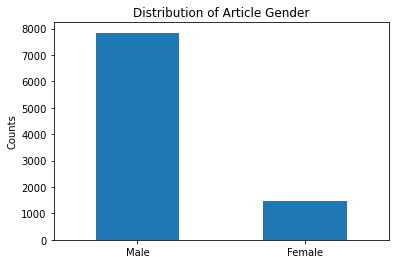

In [405]:
#Fordelingen af gender i articles
ax = gender_counts.plot(kind='bar', title='Distribution of Article Gender')
ax.set_xticklabels(["Male", "Female"], rotation=0)
plt.ylabel('Counts')
plt.show()

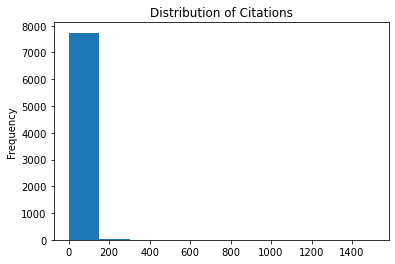

In [406]:
df_cleaned['Citations'].plot(kind='hist', title='Distribution of Citations')
plt.show()

# Word clouds & entiment analysis

Top 10 words for Female authors: [('study', 4689), ('market', 4586), ('model', 4256), ('effect', 4235), ('country', 4157), ('paper', 3669), ('also', 3514), ('result', 3331), ('time', 3323), ('economic', 3223)]
Top 10 words for Male authors: [('model', 30934), ('market', 23367), ('study', 21495), ('effect', 20417), ('paper', 18871), ('result', 17793), ('economic', 17509), ('country', 17376), ('also', 16975), ('firm', 16565)]


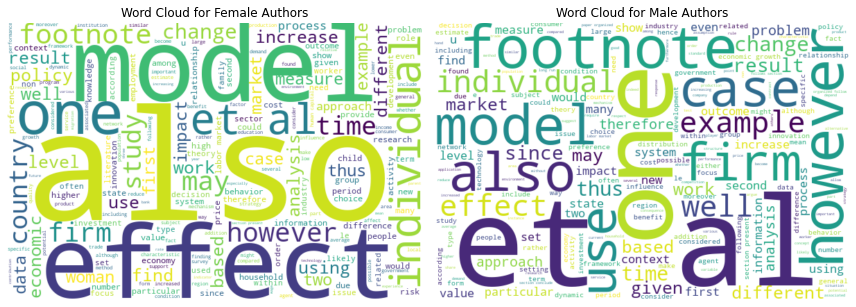

In [407]:
# Convert 'Article_Gender' to 0 for Female and 1 for Male
df_cleaned['Article_Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

# Initialize a CountVectorizer with 1-gram and 2-gram setting
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df_cleaned['Intro'])

# Separate the data by gender
female_rows = df_cleaned['Article_Gender'] == 0
male_rows = df_cleaned['Article_Gender'] == 1

# Get the sum of each word occurrence for each gender
female_sum = X[female_rows].sum(axis=0)
male_sum = X[male_rows].sum(axis=0)

# Create dictionaries of word occurrences for each gender
female_word_counts = {word: female_sum[0, idx] for word, idx in vectorizer.vocabulary_.items()}
male_word_counts = {word: male_sum[0, idx] for word, idx in vectorizer.vocabulary_.items()}

# Get top 10 words for each gender
top_female_words = sorted(female_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_male_words = sorted(male_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 words for Female authors:", top_female_words)
print("Top 10 words for Male authors:", top_male_words)

# Generate word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for Female authors
female_text = ' '.join(df_cleaned[female_rows]['Intro'])
female_wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=stop_words).generate(female_text)

# Generate word cloud for Male authors
male_text = ' '.join(df_cleaned[male_rows]['Intro'])
male_wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=stop_words).generate(male_text)

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# For Female authors
plt.subplot(1, 2, 1)
plt.imshow(female_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Female Authors')

# For Male authors
plt.subplot(1, 2, 2)
plt.imshow(male_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Male Authors')

plt.tight_layout()
plt.show()

In [408]:
# Initialize a CountVectorizer with only 2-gram setting to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df_cleaned['Intro'])

# Separate the data by gender
female_rows = df_cleaned['Article_Gender'] == 0
male_rows = df_cleaned['Article_Gender'] == 1

# Get the sum of each bigram occurrence for each gender
female_sum = X[female_rows].sum(axis=0)
male_sum = X[male_rows].sum(axis=0)

# Create dictionaries of bigram occurrences for each gender
female_word_counts = {word: female_sum[0, idx] for word, idx in vectorizer.vocabulary_.items()}
male_word_counts = {word: male_sum[0, idx] for word, idx in vectorizer.vocabulary_.items()}

# Get top 10 bigrams for each gender
top_female_bigrams = sorted(female_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_male_bigrams = sorted(male_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 bigrams for Female authors:", top_female_bigrams)
print("Top 10 bigrams for Male authors:", top_male_bigrams)

Top 10 bigrams for Female authors: [('et al', 2071), ('labor market', 821), ('human capital', 482), ('section present', 474), ('economic growth', 412), ('follows section', 393), ('labour market', 393), ('organized follows', 388), ('paper organized', 374), ('developing country', 353)]
Top 10 bigrams for Male authors: [('et al', 13298), ('economic growth', 2954), ('section present', 2235), ('organized follows', 2053), ('labor market', 1975), ('follows section', 1924), ('paper organized', 1893), ('long run', 1709), ('section concludes', 1616), ('monetary policy', 1580)]


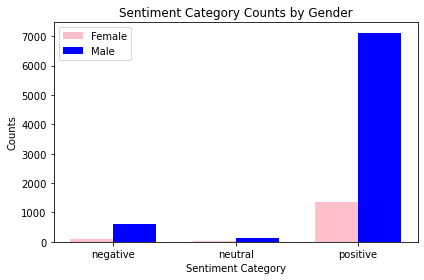

In [409]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df_cleaned['sentiment'] = df_cleaned['Intro'].apply(get_sentiment)

sentiment_counts_female = df_cleaned[df_cleaned['Article_Gender'] == 0]['sentiment'].value_counts().to_dict()
sentiment_counts_male = df_cleaned[df_cleaned['Article_Gender'] == 1]['sentiment'].value_counts().to_dict()

labels = ['negative', 'neutral', 'positive']
female_counts = [sentiment_counts_female.get(label, 0) for label in labels]
male_counts = [sentiment_counts_male.get(label, 0) for label in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, female_counts, width, label='Female', color='pink')
rects2 = ax.bar(x + width/2, male_counts, width, label='Male', color='blue')

ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Counts')
ax.set_title('Sentiment Category Counts by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

# Supervised Machine Learning

In [410]:
# Separate the data into majority and minority classes
df_majority = df_cleaned[df_cleaned['Article_Gender'] == 1]
df_minority = df_cleaned[df_cleaned['Article_Gender'] == 0]

# Check if the dataframes are correctly defined
print("Majority class size:", len(df_majority))
print("Minority class size:", len(df_minority))

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123)  # reproducible results

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_downsampled['Article_Gender'].value_counts())

Majority class size: 7845
Minority class size: 1456
0    1456
1    1456
Name: Article_Gender, dtype: int64


In [411]:
# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the 'Intro' column to get the TF-IDF representation
X = vectorizer.fit_transform(df_balanced['Intro'])
y = df_balanced['Article_Gender']

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8225806451612904

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        61
           1       0.87      0.76      0.81        63

    accuracy                           0.82       124
   macro avg       0.83      0.82      0.82       124
weighted avg       0.83      0.82      0.82       124



Baseline Accuracy: 0.8435


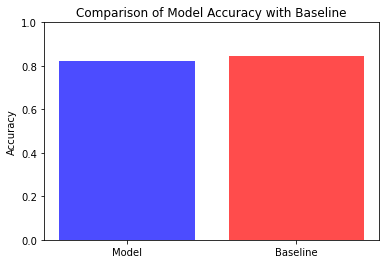

In [415]:
# Calculating the baseline accuracy
baseline_accuracy = max(df_cleaned['Article_Gender'].mean(), 1 - df_cleaned['Article_Gender'].mean())
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

accuracies = [accuracy_score(y_test, y_pred), baseline_accuracy]
labels = ["Model", "Baseline"]

plt.bar(labels, accuracies, color=['blue', 'red'], alpha=0.7)
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracy with Baseline")
plt.ylim([0, 1])  # Making sure our y-axis starts at 0 and ends at 1 for clearer comparison
plt.show()